# Self Study 11: 2nd Order Difference Equations and Multiplier-Accelerator Models

In this self study we will review how to work with difference equations, solve them analytically and interpret their behaviour given their characteristic equation.

Specifically, in this self study we will:

1. Review how to solve a 1st order difference equation
2. See how to solve a 2nd order difference equation
3. Derive the analytical solution for  a simplified multiplier-accelerator model
4. Interpret the solution of the multiplier-accelerator model, using the characteristic equation


In [190]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# set nice plotting defaults
plt.style.use('seaborn-v0_8-whitegrid')

## Section 1: 1st to 2nd order linear *difference* equations

To explore and solve models defined as difference equations we need to learn how to work with them. We will start with first order difference equations. These are equations where the variable of interest is only a function of its previous value.

Consider the first order homogeneous linear difference equation.
$$
x(t+1) = a x(t) \quad \text{and} \quad x(0) = a x_0
$$

Lets look at a few value of $t$, to see if there is a pattern.

In [191]:
x = sp.Function("x")
x0 = sp.symbols("x_0")
a = sp.symbols("a")

def x_func(t, a):
    return x0 if t == 0 else a * x_func(t - 1, a)

for t in [0, 1, 2, 3, 10]:
    expression = x_func(t, a)
    display(Markdown(f"$$ x({t}) = {sp.latex(expression)} $$"))

$$ x(0) = x_{0} $$

$$ x(1) = a x_{0} $$

$$ x(2) = a^{2} x_{0} $$

$$ x(3) = a^{3} x_{0} $$

$$ x(10) = a^{10} x_{0} $$

Indeed we see that $x(t) = a^t x_0$ is a solution to the difference equation. With this we have found a way to express the evolution of $x(t)$ for any $t$. Also for $t \in \mathbb{R}$, as long as we take only the real part.

#### An Example: The Harrod-Domar Model

As an example of an economic model formulated as first order difference equation lets consider the *Harrod-Domar* model of economic growth. The model is characterized by the following equations:

$$
\begin{align*}
S_t &= s Y(t) \\
I_t &= v ( Y(t) - Y(t-1) ) \\
S_t &= I_t \\
\end{align*}
$$

where $S$ is the savings, $I$ is investment, $Y$ is the output, $s$ the savings rate and $v$ is the capital accumulation rate. The last equation is an accounting identity that says that savings and investment are equal, despite the fact that they are determined by different factors.

Solving for $Y(t)$ we get the following first order difference equation:

$$
Y(t) = \frac{v}{v-s} Y(t-1)
$$

**Question:** What is the equilibrium of the system, i.e., what is $Y^*$ such that $Y(t) = Y(t-1) = Y^*$?

**Answer:** $Y^* = 0$





**Question:** Wat is the analytical solution for the *evolution* of $Y(t)$?

**Answer:** $(\frac{v}{v-s})^t \cdot Y(0)$


**Task:** Define the evolution of output $Y(t)$ in two ways, analytically (i.e., the answer above) and recursively (i.e, applying $Y(t)$ iteratively to itself with $Y(0) = Y_0$. 

Plot them for $t$ from 0 to 10 and show that they are the same.

In [192]:
# plot the system for different values of a
from ipywidgets import interact
from functools import lru_cache

# When working with recursive function we may end up calling the same function far "too often".
# Specifically, we may call the function with the same arguments yielding the same result multiple times.
# This is a waste of computation. We can avoid it by using "memoization", i.e. storing the
# results of previous function calls. This is what the @lru_cache decorator does.

@lru_cache(maxsize=None)
def hd_recursion(x0, t, v, s):
    # this function will call itself multiple times with the same arguments.
    # NOTE: when t=0, return x0, otherwise the function will never terminate.
    return x0 if t == 0 else v/(v-s)*hd_recursion(x0, t-1, v, s)

# plot the system for different values of a
@interact(x0=(0,100,0.1), v=(0,1,.01), s=(0,1,.01))
def plot_hd_recursive(x0=2, v=.7, s=.15):
    t = np.linspace(0,10,11)
    y = [hd_recursion(x0,time,v,s) for time in t]
    plt.figure(figsize=(12,6))
    plt.plot(t,y)


interactive(children=(FloatSlider(value=2.0, description='x0'), FloatSlider(value=0.7, description='v', max=1.…

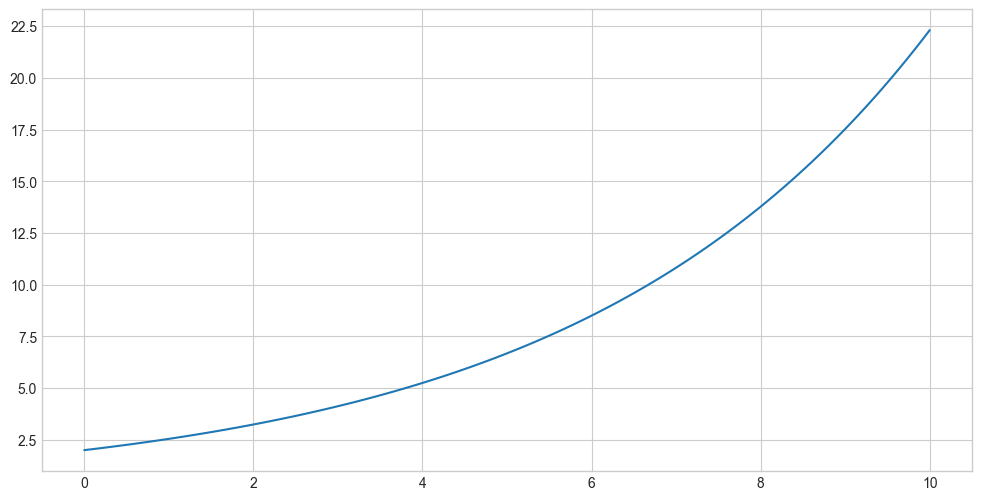

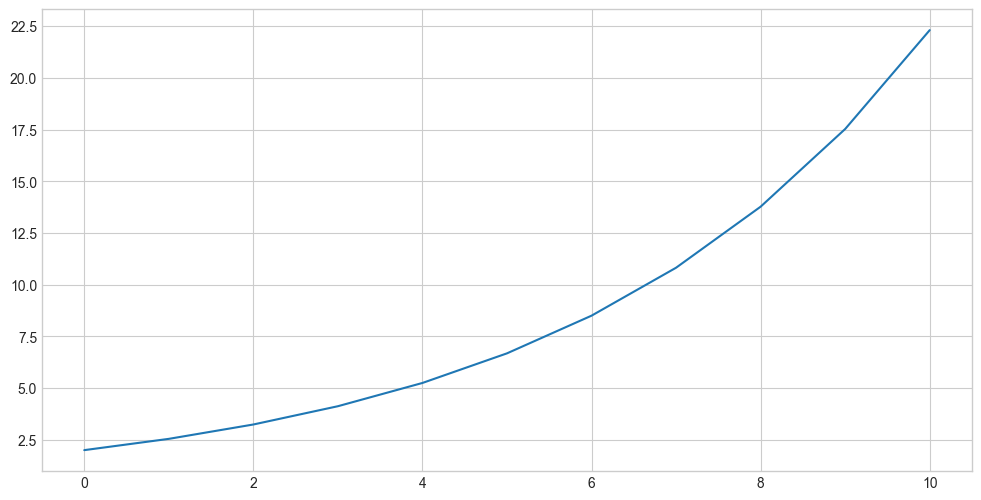

In [193]:
def hd_analytic(x0, t, v, s):
    return (v/(v-s))**t * x0


# @interact(x0=(0,10,.1),s=(0.01, 0.99, 0.01), v=(0.1, 0.99, 0.01))
def plot_hd_analytic(x0, s, v):
   t = np.linspace(0,10,110)
   y = hd_analytic(x0, t, v, s)
   plt.figure(figsize=(12,6))
   plt.plot(t,y)
   plt.show()
    
plot_hd_analytic(x0=2, s=0.15, v=0.7)
plot_hd_recursive(x0=2, s=0.15, v=0.7)

**Question:** What can we say about the behaviour of the system for $a = \frac{v}{v-s}$?

**Answer:** Normal exponential growth

#### Non-homogeneous 1st order difference equations

Consider a slight modification of the Harrod-Domar model, where we add a constant term to the investment $I_0$. You can think of this as a government investment program.

$$
\begin{align}
S_t &= s Y(t) \\
I_t &= v ( Y(t) - Y(t-1) ) + I_0 \\
S_t &= I_t \\
\end{align}
$$

**Question:** What is the equilibrium of the system now?

In [194]:
from sympy import Eq, solve

s = sp.symbols("s")
v = sp.symbols("v")
t = sp.symbols("t", integer=True)
I_0 = sp.symbols("I_0")
Y = sp.Function("Y")

def S_t(s, t):
    return s*Y(t)

def I_t(v, t, I0):
    return v*(Y(t)-Y(t-1))+I0

# f = (v*(Y(t)-Y(t-1))+I_0)/s - Y(t) # type: ignore

# Your code here, or solve it by hand
Eq(s*Y(t), v*(Y(t)-Y(t-1))+I_0)

sol = solve(Eq(S_t(s, t), I_t(v, t, I_0)), Y(t))[0] # type: ignore
ans = solve(Eq(sol.subs({Y(t-1) : Y(t)}), Y(t)), Y(t))[0] # type: ignore

# ans = solve(f, Y(t))[0] # type: ignore
display(Markdown(f"$$Y^* = {sp.latex(ans)}$$"))

$$Y^* = \frac{I_{0}}{s}$$

**Answer:**

**Solving for the evolution of $Y(t)$**

An approach to solve *non-homogeneous* difference equations to subtract from all $Y(t)$ the equilibrium $Y^*$.
$$
\begin{align}
Y(t) - Y^* &= \frac{v}{v-s} \left( Y(t-1) - Y^* \right) \\
\bar{Y}(t) &= \frac{v}{v-s} \bar{Y}(t-1)
\end{align}
$$

After defining $\bar{Y}(t) = Y(t) - Y^*$ we are back to a homogeneous difference equation, for which we already know the solution.

$$
\bar{Y}(t) = \left(\frac{v}{v-s}\right)^t \bar{Y}(0)
$$

In short we have shown tha the solution to the non-homogeneous difference equation can be reduced to the solution of the homogeneous difference equation if we subtract the equilibrium from the variable of interest.

## Intermezzo: 2nd order linear *difference* equations

Lets consider a second order linear difference equation.

$$
x(t+2) = a x(t+1) + b x(t)
$$

We have seen that the solution to the *first order* difference equation is given by $x(t) = a^t x_0$.\
Through an analogous, but more involved argument, one can show that the solution to the second order difference equation has the form 


$$
x(t) = c_1 r^t + c_2 s^t
$$

for some constants $r$, $s$ and $c_1$ and $c_2$. If this is indeed the solution, then it should also be the case that:

$$
\underbrace{c_1 r^{t+2} + c_2 s^{t+2}}_{x(t+2)} = \underbrace{a \left( c_1 r^{t+1} + c_2 s^{t+1} \right) + b \left( c_1 r^t + c_2 s^t \right)}_{ a x(t+1) + b x(t)}
$$

To find the solution we need to find $r$ and $s$ satisfying this relation. Lets rearrange the equation a bit and factor to get:
$$
c_1 r^t \left( r^2 - a r - b \right) + c_2 s^t \left( s^2 - a s - b \right) = 0
$$

This relation is satisfied *iff* both coefficients involving $r$ and $s$, of the **characteristic equation** are zero:

$$
x^2 - a x - b = 0 \qquad  x \in \{r, s\}
$$

That is,
$$
r, s = \frac{-a \pm \sqrt{a^2 + 4 b}}{2}
$$

where $r$ is the larger root, i.e, $|r| > |s|$, which is also known as the **dominant root**.


To find $c_1$ and $c_2$ we recall that:
$$
\begin{align}
y_0 &= c_1 r^0 + c_2 s^0 = c_1 + c_2 \\
y_1 &= c_1 r^1 + c_2 s^1 = c_1 r + c_2 s
\end{align}

**Question:** Find the analytical expression for $c_1$ and $c_2$ given the system of equations above.

**Answer:**



#### Interpreting the Roots of Second-Order Difference Equations

There is a close connection between the roots of the characteristic equation and the behaviour of the system [^1]. We can distinguish three cases:

1. The roots are real and distinct, i.e., $r \neq s$.
2. The roots are real and equal, i.e., $r = s$.
3. The roots are complex conjugates, i.e., $r = \alpha + i \beta$ and $s = \alpha - i \beta$.


##### Case 1: Real and Distinct Roots

The long term behaviour is determined by the dominant root, $r$.

1. $r > 1$ the system diverges, since $r^t \to \infty$ as $t \to \infty$.
2. $r = 1$ the system is stable, since $r^t = 1$ for all $t$.
3. $0 \leq r < 1$ the system monotonically decays to zero: $r^t \to 0$ as $t \to \infty$.
4. $-1 < r \leq 0$ the system oscillates and decays to zero.
5. $r = -1$ the system oscillates between 2 values: since $r^t = (-1)^t$.
6. $r < -1$ the system oscillates and diverges: $r^t \to \pm \infty$ as $t \to \infty$.

##### Case 2: Real and Equal Roots

In this case $r = s$ so we describe in terms of $r$.

1. $|r| \geq 1$ the system diverges monotonically.
2. $|r| < 1$ the system converges to zero.
4. $r \leq -1$ the system oscillates

##### Case 3: Complex Conjugate Roots

Ihe solutions are of the form: $r = \alpha + i \beta$ and $s = \alpha - i \beta$.

In this case the system oscillates.
Whether it decays or diverges depends on a more complicated relationship, but you are welcome to explore this on your own [^1].


[^1]: *See Shone, Economic Dynamics (2002), Chapter 3 for more details*


### Summary:
In short we has seen how to solve the 2nd order linear difference equation via the characteristic equation.

Note how to obtain the characteristic equation from the difference equation:

$$
\begin{align}
y(t+2) &= a y(t+1) + b y(t) \\
y(t+2) - a y(t+1) - b y(t)&= 0 \\
x^2 - a x - b &= 0
\end{align}
$$

after solving for $r$ and $s$ we can write the solution as:

$$
x(t) = c_1 r^t + c_2 s^t
$$

The behaviour of the system is determined by the roots of the characteristic equation, specifically the dominant root $r$.

## Section 2: The Multiplier-Accelerator Model (Evolution)

The multiplier-accelerator first outlined by Samuelson (1939) is a simple model of the business cycle. I will use a slightly different version from the one used in the lecture.

$$
C_t = a + b Y_{t-1}
$$

Investment is a function of the change in output,

$$
I_t = v ( Y_{t-1} - Y_{t-2} )
$$

Finally we assume that the economy is closed,
$$
Y_t = C_t + I_t
$$

Notice, how the model can be seen as an extension of the Harrod-Domar model.
### Task 1: Find the recurrence relation

Find $Y_t$ as a function of its previous values, e.g., $Y_{t-1}$ and $Y_{t-2}$.

In [195]:
# your code here or solve it by hand
Y = sp.Function('Y')
I = sp.Function('I')
C = sp.Function('C')
a, b, v, t = sp.symbols('a b v t')

def Y_func(t, I, C):
    return C(t, a, b, Y) + I(t, v, Y)

def C_func(t, a, b, Y):
    return a + b*Y(t-1)

def I_func(t, v, Y):
    return v*(Y(t-1)-Y(t-2))

# Y = Y_func(t, I, C)

sol = sp.simplify(Eq(0, Y_func(t, I_func, C_func)-Y(t))) # type: ignore
yt_eq = Y_func(t, I_func, C_func) - Y(t)
ans = sp.simplify(sol)

display(Markdown(f"$${sp.latex(sol)}$$"))

$$a + b Y{\left(t - 1 \right)} - v \left(Y{\left(t - 2 \right)} - Y{\left(t - 1 \right)}\right) - Y{\left(t \right)} = 0$$

### Task 2: Find the equilibrium output

Find the the equilibrium output $Y^*$, i.e., the value of $Y_t$ such that $Y_t = Y_{t-1} = Y_{t-2}$.

In [196]:
## EQUILIBRIUM
# your code here or solve it by hand
eq_sub = sol.subs({Y(t-1): Y(t), Y(t-2): Y(t)}) # type: ignore

eq = solve(eq_sub, Y(t))[0] # type: ignore
display(Markdown(f"$$Y^* = {sp.latex(eq)}$$"))

$$Y^* = - \frac{a}{b - 1}$$

### Task 3: Plot the evolution of the system and the equilibrium

Using the recurrence relation you found above and the equilibrium value, plot the evolution of the system for different values of $b$ and $v$.
Specifically, plot $Y_t$ and $Y^*$ as a function of $t$ and the phase diagram of $Y_{t-1}$ vs $Y_t$.

In [197]:


@lru_cache(maxsize=None)
def y_evolution(t, a, b, v, y0, y1):
    # your code here
    if t == 0:
        return 0
    elif t==1:
        return y0
    elif t == 2:
        return y1
    else:
        y_tm1 = y_evolution(t-1,a,b,v,y0,y1)
        return a+b*y_tm1 - v*(y_evolution(t-2, a, b, v, y0, y1)-y_tm1)

# Plot the evolution of y for different values of a and b
@interact(a=(0,1,.01), b=(0,1,.01))
def plot_y_evolution(a=0.4, b=0.5):

    t = np.linspace(1,14,14)
    y = [y_evolution(time, a, b, 0.8, 0.1, 0.2) for time in t]
    equilib = -a/(b-1)
    plt.figure(figsize=(12,6))
    plt.plot(t,y, marker='o')
    plt.plot(t, equilib*np.ones_like(t), linestyle="--")
    plt.show()

# Plot the phase diagram for different values of a and b
    
@interact(a=(0,1,.01), b=(0,1,.01))
def plot_phase(a=0.4, b=0.5):

    t = np.linspace(1,40,40)
    y = [y_evolution(time, a, b, 1, 0.1, 0.2) for time in t]


    equilib = -a/(b-1)
    plt.figure(figsize=(12,6))
    plt.plot(y[:-1], y[1:], marker='o')
    plt.show()

interactive(children=(FloatSlider(value=0.4, description='a', max=1.0, step=0.01), FloatSlider(value=0.5, desc…

interactive(children=(FloatSlider(value=0.4, description='a', max=1.0, step=0.01), FloatSlider(value=0.5, desc…

## Section 3: The Multiplier-Accelerator Model (Characteristics Equation)

### Task 1: Finding the characteristic equation

To simplify the derivation we will assume that we deal with a homogeneous system, i.e., we assume that in the model $a = 0$.

Remember from the previous section that the characteristic equation (in $x$) for the difference equation (in $y$) is given by:


$$
\begin{align}
y(t+2) &= &A y(t+1) + &B y(t) \\
0 &= y(t+2) &- A y(t+1) - &B y(t) \\
0 &= x^2 &- A x - &B
\end{align}
$$

So we need to find the the coefficients after putting the difference equation in the form, and identify $A$ and $B$.

$$
Y(t) - A Y(t-1) + B Y(t-2) = 0
$$

and find the roots of the characteristic equation.

In [210]:
x = sp.symbols('x')
char_A = b+v
char_B = v

char_eq = yt_eq * -1 + a
display(sp.expand(char_eq))
sol = solve(Eq(x**2-char_A*x+char_B, 0), x)
sol1 = sol[0]
sol2 = sol[1]
display(Markdown((f"$$s = {sp.latex(sol1)}$$ ")))
display(Markdown((f"$$r = {sp.latex(sol2)}$$ ")))

-b*Y(t - 1) + v*Y(t - 2) - v*Y(t - 1) + Y(t)

$$s = \frac{b}{2} + \frac{v}{2} - \frac{\sqrt{b^{2} + 2 b v + v^{2} - 4 v}}{2}$$ 

$$r = \frac{b}{2} + \frac{v}{2} + \frac{\sqrt{b^{2} + 2 b v + v^{2} - 4 v}}{2}$$ 

Characteristic equation:
$$x^2 - (b+v)x+v$$

**Question:** What are the roots of the characteristic equation? What can these roots tell us about the behaviour of the system?

**Answer:** The long term behavior is determined by $r$:

1. $r > 1$ the system diverges, since $r^t \to \infty$ as $t \to \infty$.
2. $r = 1$ the system is stable, since $r^t = 1$ for all $t$.
3. $0 \leq r < 1$ the system monotonically decays to zero: $r^t \to 0$ as $t \to \infty$.
4. $-1 < r \leq 0$ the system oscillates and decays to zero.
5. $r = -1$ the system oscillates between 2 values: since $r^t = (-1)^t$.
6. $r < -1$ the system oscillates and diverges: $r^t \to \pm \infty$ as $t \to \infty$.

#### Task 2: Find the analytical solution for the multiplier-accelerator model


**Question:** With $r$ and $s$ write down the explicit form for $c_1$ and $c_2$ for the multiplier-accelerator model.


**Answer:**



In [211]:
y0, y1 = sp.symbols("y_0 y_1")
r = sol2.subs({A: b+v, B: -v})
s = sol1.subs({A: b+v, B: -v})
c1 = (y0*s-y1)/(s-r).subs({A: b+v, B: -v})
c2 = (y1-y0*r)/(s-r).subs({A: b+v, B: -v})
display(Markdown(f"$$c_1 = {sp.latex(c1)}$$"))
display(Markdown(f"$$c_2 = {sp.latex(c2)}$$"))


$$c_1 = - \frac{y_{0} \left(\frac{b}{2} + \frac{v}{2} - \frac{\sqrt{b^{2} + 2 b v + v^{2} - 4 v}}{2}\right) - y_{1}}{\sqrt{b^{2} + 2 b v + v^{2} - 4 v}}$$

$$c_2 = - \frac{- y_{0} \left(\frac{b}{2} + \frac{v}{2} + \frac{\sqrt{b^{2} + 2 b v + v^{2} - 4 v}}{2}\right) + y_{1}}{\sqrt{b^{2} + 2 b v + v^{2} - 4 v}}$$

**Question:** What does the equation for $Y_t$ look like (with $a=0$)? (Note, it is not a nice expression).

In [218]:
# putting it all together
t, b, v = sp.symbols('t, b, v')
# y = c1*r**t + c2*s**t
def y_func(t, c1, c2, r, s):
    return (c1*r**t + c2*s**t)

def full_y(t, b, v, c1, c2, r, s):
    return b*y_func(t-1, c1, c2, r, s)-v*(y_func(t-2, c1, c2, r, s)-y_func(t-1, c1, c2, r, s))

y = (b*y_func(t-1, c1, c2, r, s)-v*(y_func(t-2, c1, c2, r, s)-y_func(t-1, c1, c2, r, s)))
# sp.simplify(y)
y_homogen = c1*r**t + c2*s**t
y_homogen
# print(full_y(t, b, v, c1, c2, r, s).subs({b: 0.8, v: 1, y0: 0.1, y1: 0.2, t:3}))

-(y_0*(b/2 + v/2 - sqrt(b**2 + 2*b*v + v**2 - 4*v)/2) - y_1)*(b/2 + v/2 + sqrt(b**2 + 2*b*v + v**2 - 4*v)/2)**t/sqrt(b**2 + 2*b*v + v**2 - 4*v) - (-y_0*(b/2 + v/2 + sqrt(b**2 + 2*b*v + v**2 - 4*v)/2) + y_1)*(b/2 + v/2 - sqrt(b**2 + 2*b*v + v**2 - 4*v)/2)**t/sqrt(b**2 + 2*b*v + v**2 - 4*v)

### Task 4: Plot the analytical solution


Using the analytical solution you found above, plot the evolution of the system for different values of $b$ and $v$.

In [222]:
@interact(b_val=(0,1,.01), v_val=(0,1,.01))
def plot_analytic_sol(b_val=0.8, v_val=0.9):
    t_vals=np.linspace(0,20,20)
    y_vals = [sp.lambdify(t, y_homogen.subs({b: b_val, v: v_val, y0: 0, y1: 1, t: time}))(time) for time in t_vals]
    plt.figure(figsize=(12,6))
    plt.plot(t_vals,y_vals)
    plt.show()

interactive(children=(FloatSlider(value=0.8, description='b_val', max=1.0, step=0.01), FloatSlider(value=0.9, …

### Task 5: Interpret analytical solution using the dominant root

**Question:** What is the dominant root?

**Answer:** 

**Question:** Given the following values for $b$ and $v$ and the resulting $r$ and $s$, what can you say about the behaviour of the system?

In [223]:
def roots(b, v):
    char_A = (b + v)
    char_B = v
    rs = sp.solve(x**2 - char_A * x + char_B, x)
    if len(rs) == 1: # only a single root r=s
        return rs[0], rs[0]
    else:  # return the root with the largest absolute value first
        return sorted(rs, key=lambda r: np.abs(r), reverse=True)

parameters = [
    {"b": 1/2, "v": 3},
    {"b": 1, "v": 1/2},
    {"b": 1, "v": 1},
    {"b": 1/2, "v": 1/2},
]

# print nicely formatted table in markdown
table = "| $b$ | $v$ | $r$ | $s$ |\n|---|---|---|---|\n"
for p in parameters:
    r, s = roots(**p)
    table += f"| {p['b']} | {p['v']} | {r} | {s} |\n"
display(Markdown(table))

| $b$ | $v$ | $r$ | $s$ |
|---|---|---|---|
| 0.5 | 3 | 2.00000000000000 | 1.50000000000000 |
| 1 | 0.5 | 1.00000000000000 | 0.500000000000000 |
| 1 | 1 | 1 | 1 |
| 0.5 | 0.5 | 0.5 - 0.5*I | 0.5 + 0.5*I |
